In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.pca import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
df = pd.read_csv('datasets/MI_timesteps.txt',delim_whitespace=True)
data = np.array(df,dtype=float)
# remove burn-in period of 1000 time steps 
data = data[1000:, ]

In [3]:
data.shape

(14001, 10)

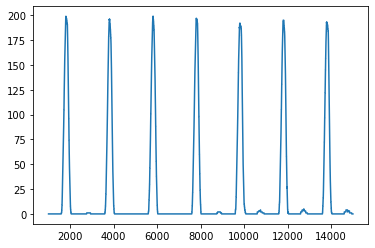

In [4]:
plt.plot(data[:, 0], data[:, 1])

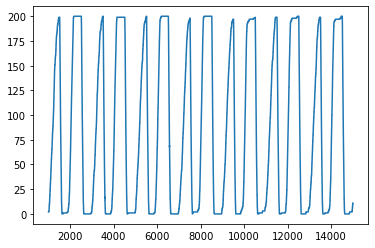

In [5]:
plt.plot(data[:, 0], data[:, 2])

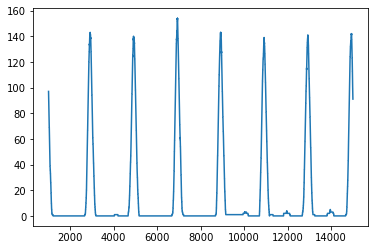

In [6]:
plt.plot(data[:, 0], data[:, 3])

## Task5.1

In [7]:
delay = 351
delay_embedd = np.empty((data.shape[0] - delay, delay*3))
for i in range(data.shape[0] - delay):
    delay_embedd[i] = data[i: i+delay, 1:4].reshape(-1)

In [8]:
u,s,vh,s_truncated = pca(delay_embedd, 3)

In [9]:
proj = (u @ s_truncated)

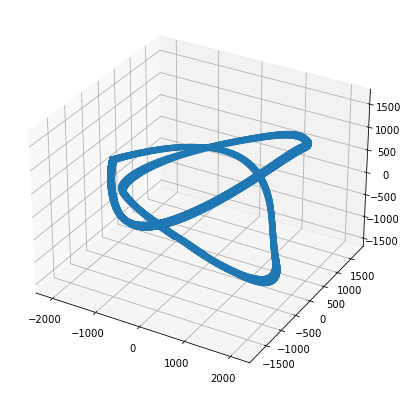

In [10]:
fig = plt.figure(figsize=(7, 7))
ax = fig.gca(projection='3d')
ax.scatter(proj[:,0], proj[:,1], proj[:,2])

# Task5.2

In [11]:
'''
for i in range(1, 10):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca(projection='3d')
    ax.scatter(proj[:, 0], proj[:, 1], proj[:, 2], c=data[delay:, i],
               cmap='jet')
    plt.suptitle('Color measurement %d in PCA Space'% i)
    
    plt.show()
'''


"\nfor i in range(1, 10):\n    fig = plt.figure(figsize=(10, 10))\n    ax = fig.gca(projection='3d')\n    ax.scatter(proj[:, 0], proj[:, 1], proj[:, 2], c=data[delay:, i],\n               cmap='jet')\n    plt.suptitle('Color measurement %d in PCA Space'% i)\n    \n    plt.show()\n"

# Task5.3

In [12]:
pca_space = proj[:,:3]

dim_index = 1
v_field, arc_function = arc_length_velocity(pca_space, data, dim_index, delay)

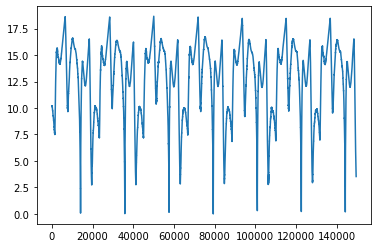

In [13]:
plt.plot(v_field[:,0], v_field[:,1])

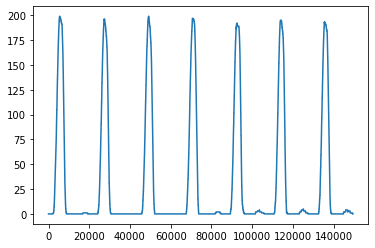

In [14]:
plt.plot(arc_function[:,0], arc_function[:,1])

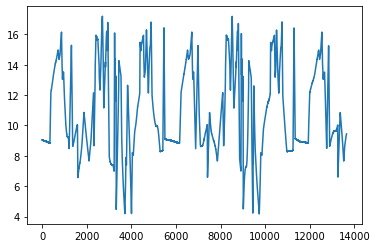

In [15]:
app_v_field,_,_,_ = rbf_sin(v_field[:,0].reshape((-1,1)), v_field[:,1].reshape((-1,1)), 100, 1e5, p=2e4)
v = app_v_field(v_field[:,0].reshape((-1,1)))
plt.plot(v)

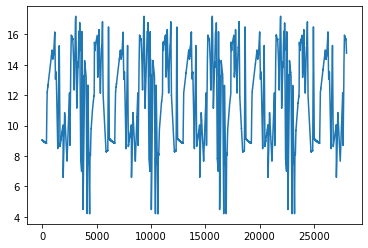

In [16]:
v_new = app_v_field(np.linspace(0,140000*2,14000*2).reshape((-1,1)))
plt.plot(v_new)

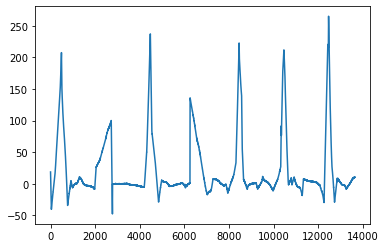

In [17]:
app_arc_function,_,_,_ = rbf_sin(arc_function[:,0].reshape((-1,1)), arc_function[:,1].reshape((-1,1)), 100, 1e5, p=5e4)
arc = app_arc_function(arc_function[:,0].reshape((-1,1)))
plt.plot(arc)

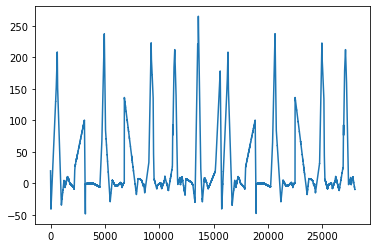

In [18]:
arc_new = app_arc_function(np.linspace(0,140000*2,14000*2).reshape((-1,1)))
plt.plot(arc_new)

# Task5.4

In [19]:
'''
prediction_arc, prediction_measurement = predict(14, v_field_o, arc_function_o)

plt.plot(prediction_arc[:,0], prediction_arc[:,1])
'''

'\nprediction_arc, prediction_measurement = predict(14, v_field_o, arc_function_o)\n\nplt.plot(prediction_arc[:,0], prediction_arc[:,1])\n'

In [20]:
'''
plt.plot(prediction_measurement[:,0], prediction_measurement[:,1])
'''

'\nplt.plot(prediction_measurement[:,0], prediction_measurement[:,1])\n'

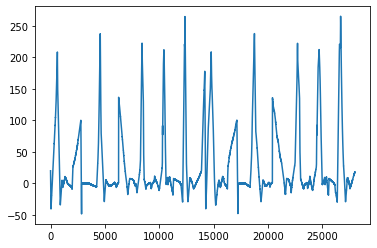

In [23]:
p_m = rbf_predict(app_v_field,app_arc_function)
plt.plot(p_m)